In [7]:
pip install pennylane --upgrade

In [8]:
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt



1. ReadXanaduQuantumCodebookI.7Tutorialandcomplete4exercises. (4points) https://codebook.xanadu.ai/I.7
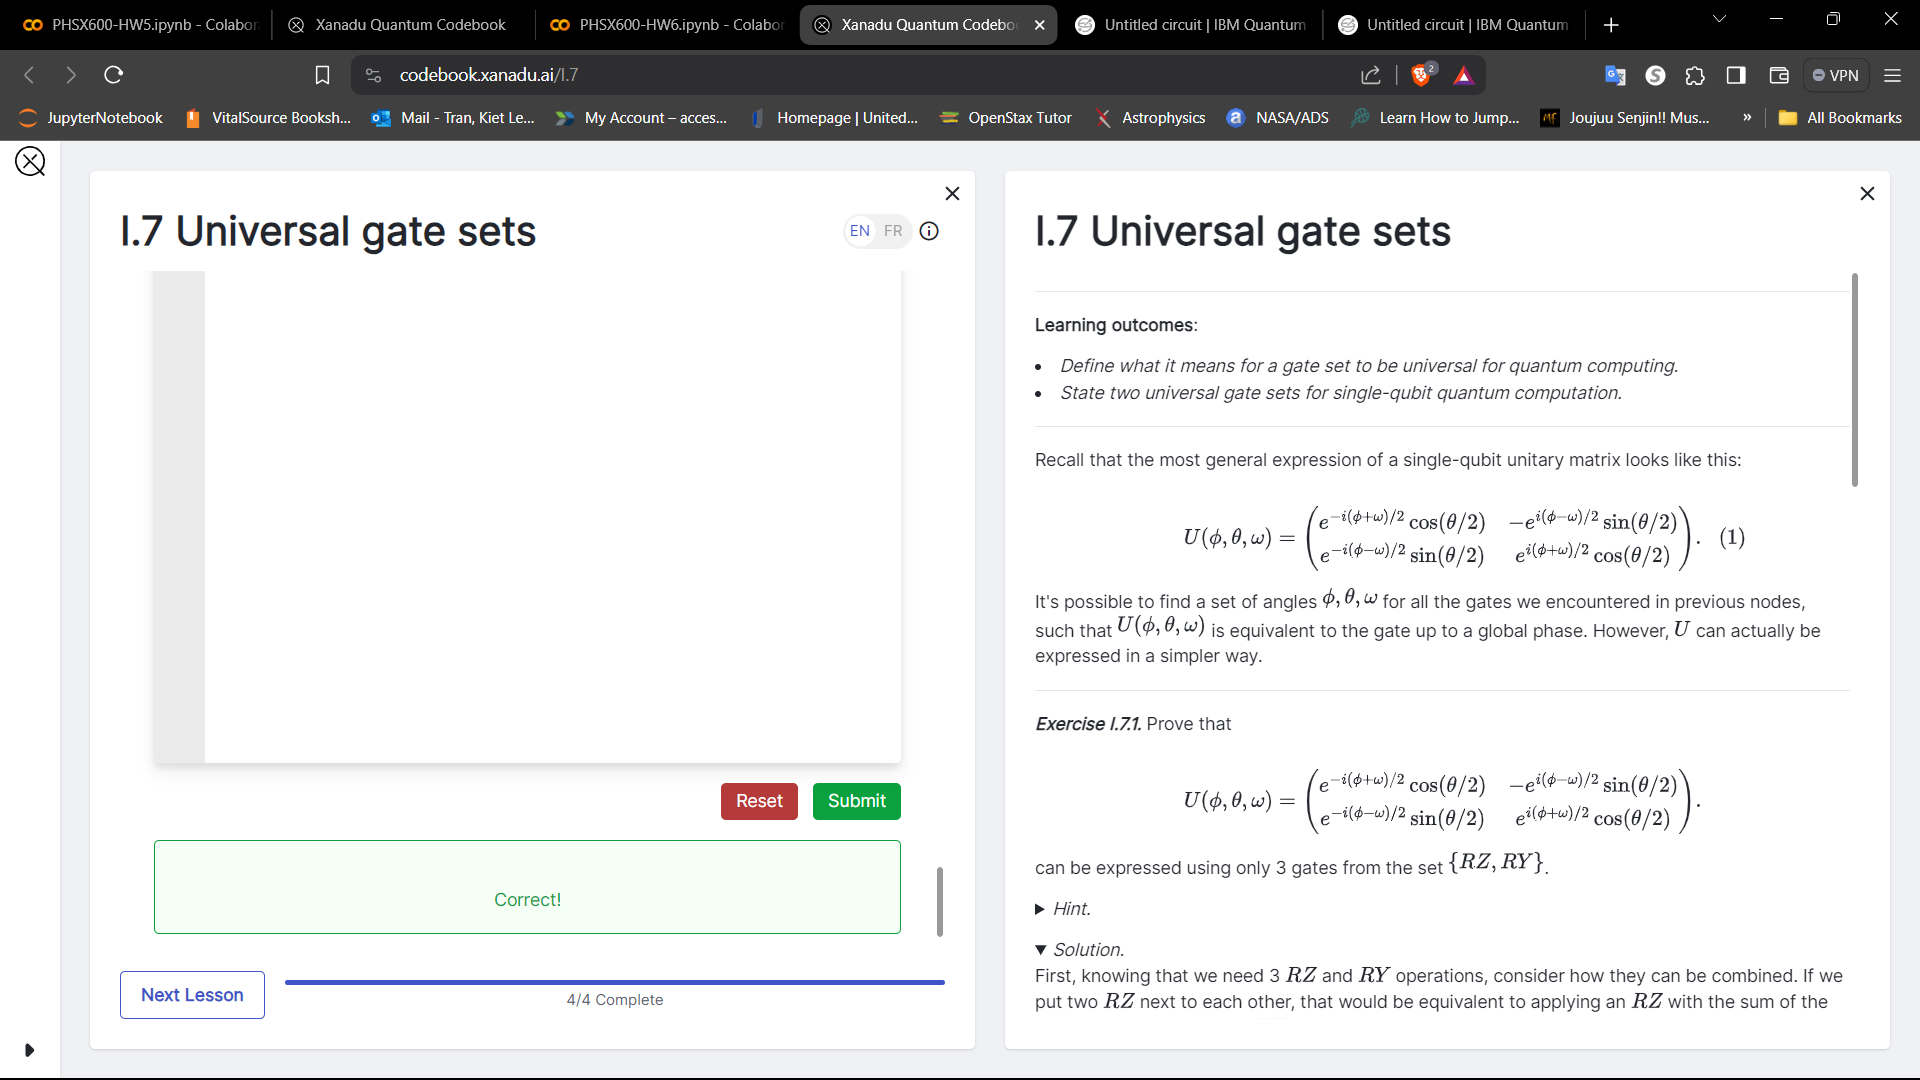

 Can you find a set of angles phi, theta, omega such that the sequence of gates

    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
acts the same as a Hadamard gate (up to a global phase)?

In [9]:
dev = qml.device("default.qubit", wires=1)

##################
# YOUR CODE HERE #
##################

# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = np.pi/2, np.pi/2, np.pi/2

@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()
hadamard_with_rz_rx()

tensor([1.11022302e-16-0.70710678j, 0.00000000e+00-0.70710678j], requires_grad=True)

Codercise I.7.2. Using the results of the previous exercise, rewrite the following circuit over the gate set [RZ, RX] (recall that it is okay for your circuit to work up to a global phase). What is the minimum number of such gates needed to do so?

In [11]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def convert_to_rz_rx():
    ##################
    # YOUR CODE HERE #
    ##################
    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX
    qml.RZ(np.pi/2, wires=0)
    qml.RX(np.pi/2, wires=0)
    qml.RZ(np.pi/2, wires=0)
    qml.RZ(9*np.pi/4, wires=0)
    qml.RZ(np.pi/2, wires=0)
    qml.RX(-np.pi, wires=0)
    qml.RZ(3*np.pi/2, wires=0)
    return qml.state()
convert_to_rz_rx()

tensor([-0.27059805+0.65328148j, -0.27059805-0.65328148j], requires_grad=True)

Codercise I.7.3. The two gates  and  are also a universal gate set. By combining just these two gates, we can approximate to arbitrary precision any single-qubit operation (just like we can do with  and )! Write a PennyLane circuit that applies the unitary matrix

using 6  and  gates altogether. Recall that the matrix form of  can be written up to a global phase as

In [12]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def unitary_with_h_and_t():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY ONLY H AND T TO PRODUCE A CIRCUIT THAT EFFECTS THE GIVEN MATRIX

    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()
unitary_with_h_and_t()

tensor([0.85355339+0.35355339j, 0.35355339+0.14644661j], requires_grad=True)

2. ReadXanaduQuantumCodebookI.8Tutorialandcomplete3exercises. (3points)https://codebook.xanadu.ai/I.8
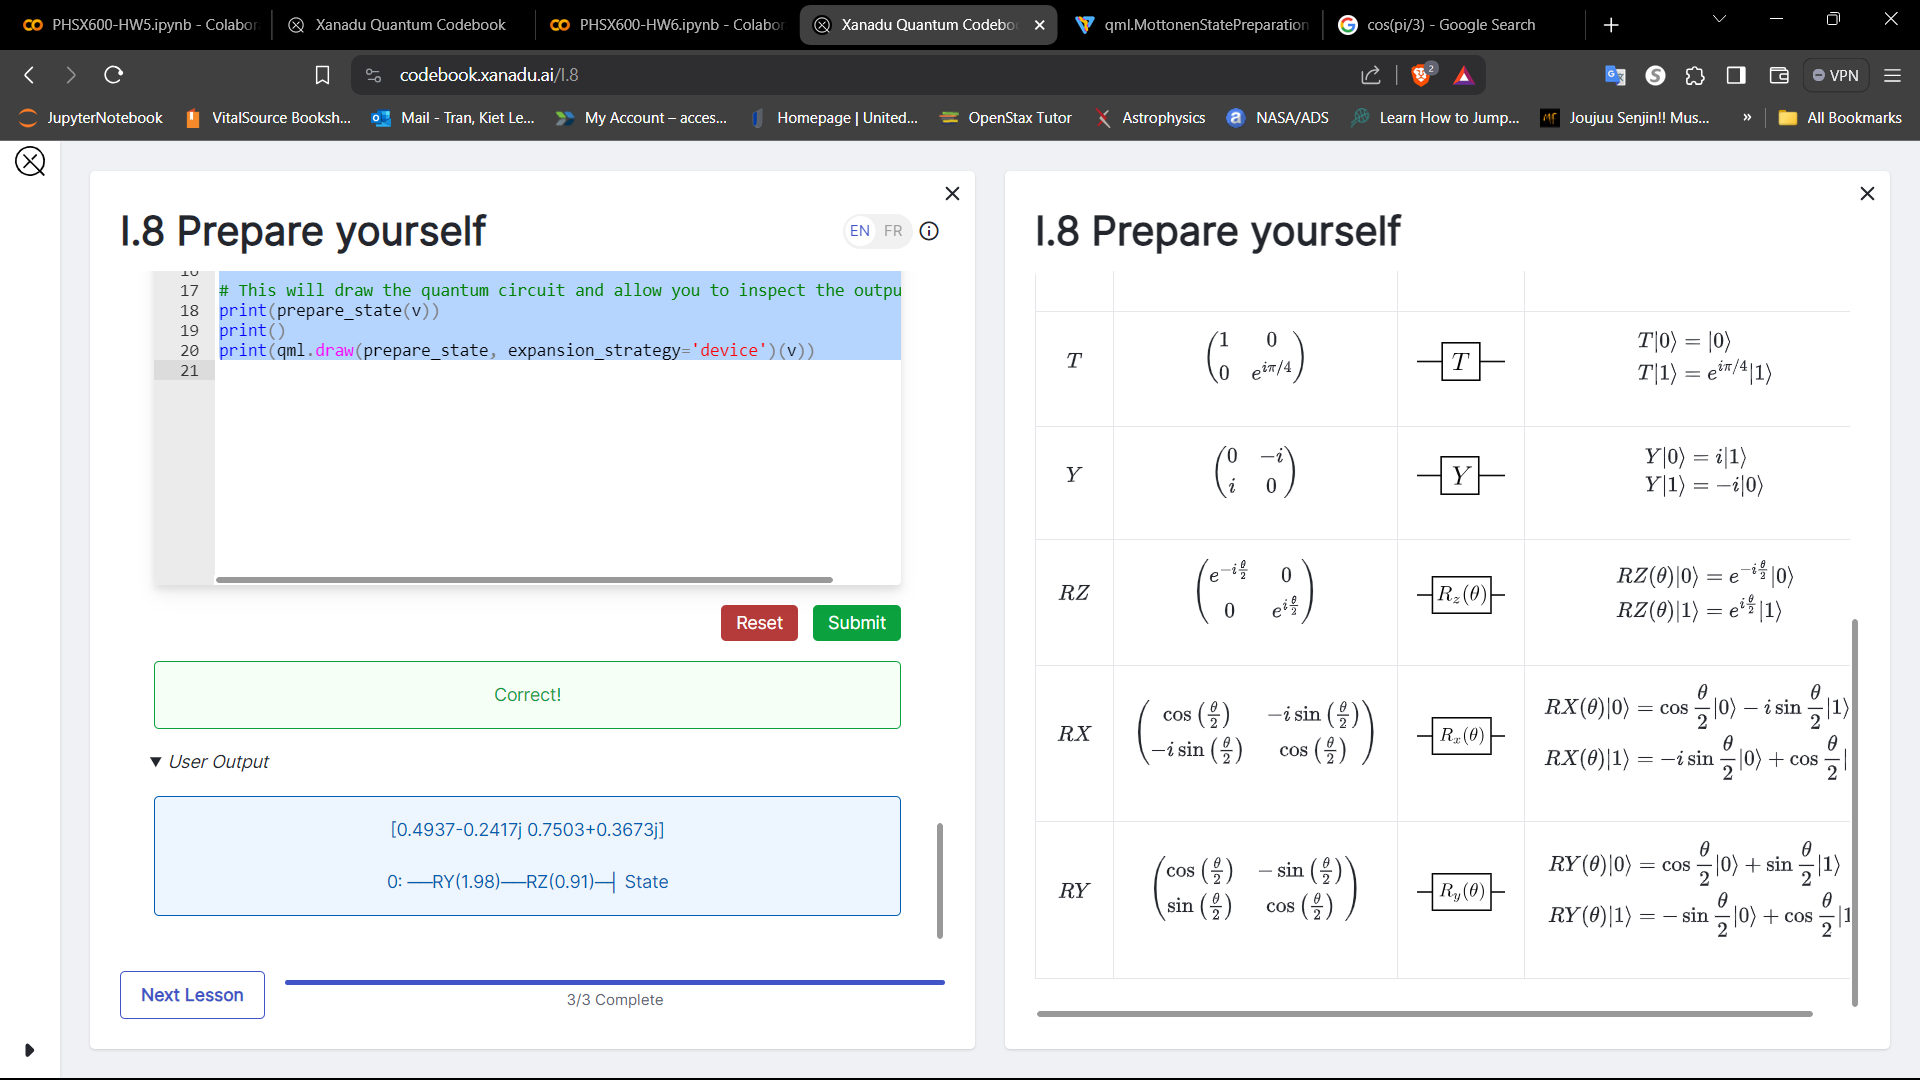

In [14]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    return qml.state()
prepare_state()

tensor([ 0.70710678+0.j , -0.5       -0.5j], requires_grad=True)

In [15]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.RX(np.pi/3, wires=0)
    return qml.state()
prepare_state()

tensor([0.8660254+0.j , 0.       -0.5j], requires_grad=True)

In [24]:
v = np.array([0.52889389-0.14956775j, 0.67262317+0.49545818j])

##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device('default.qubit', wires=1)

# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE
@qml.qnode(dev)
def prepare_state(state=v):
    qml.MottonenStatePreparation(state_vector=state, wires=range(1))
    return qml.state()

# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state, expansion_strategy='device')(v))


[0.49365933-0.24166034j 0.75032489+0.36730546j]

0: ──RY(1.98)──RZ(0.91)─┤  State


3. ReadXanaduQuantumCodebookI.9Tutorialandcomplete3exercises. (3points) https://codebook.xanadu.ai/I.9
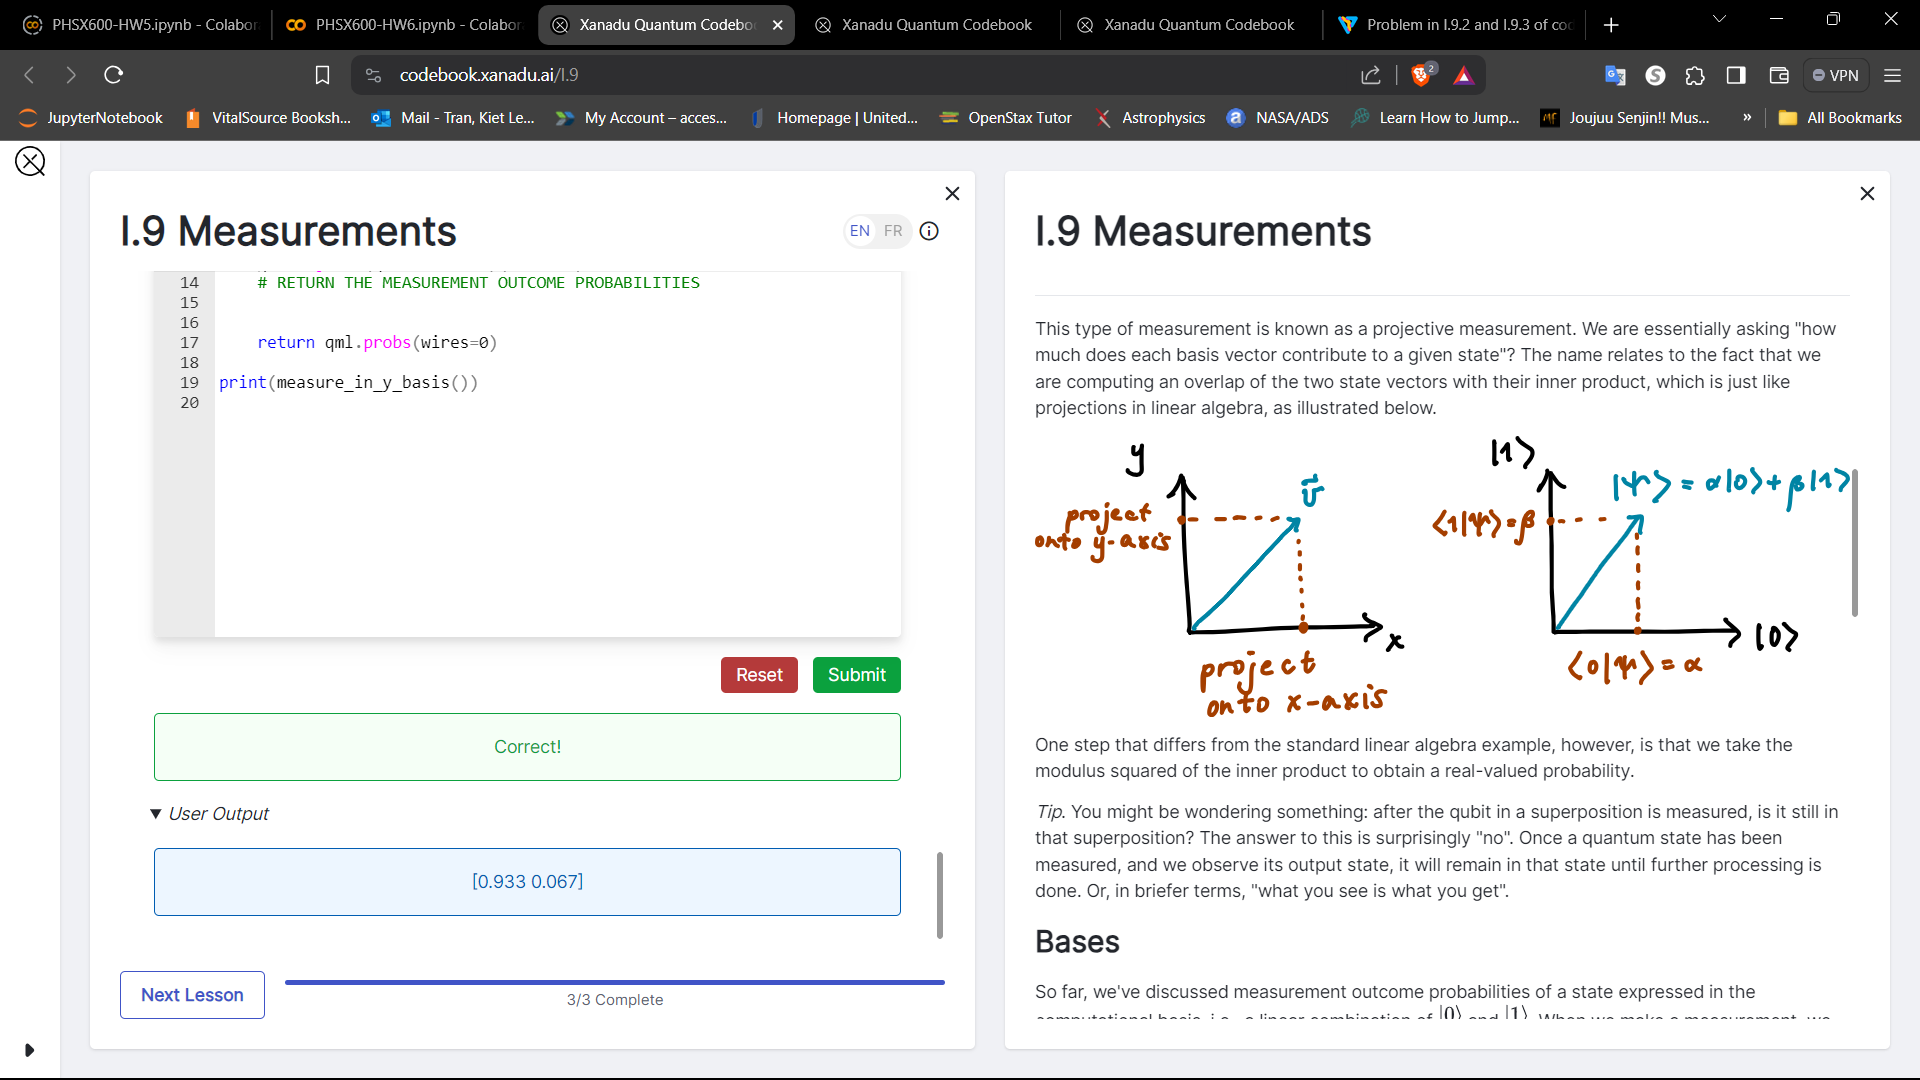

Codercise I.9.1. Write a simple circuit that applies a Hadamard gate to either  or , and returns the measurement outcome probabilities. What do you notice about these probabilities?

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.

    Returns:
        array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY HADAMARD AND MEASURE
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)

print(apply_h_and_measure(0))
print(apply_h_and_measure(1))


Codercise I.9.2. (a) Suppose we have prepared the state

and want to make a measurement in the basis

First, implement a quantum function prepare_psi that prepares the state . Then, determine how to prepare the two basis states  and  from  and  respectively. Implement this as a second quantum function, y_basis_rotation. Note that the two functions should not return any values; we will use them as subroutines in a QNode in the next exercise.

In [73]:
##################
# YOUR CODE HERE #
##################
dev = qml.device('default.qubit', wires=1)
@qml.qnode(dev)
# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    state = np.array([1/2, 1j*np.sqrt(3)/2])
    qml.MottonenStatePreparation(state_vector= state, wires=0)
    return qml.state()

# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    return qml.state()


(b) Now that we know how to produce the two basis states, we can perform a measurement in that basis. To do so, we must apply the adjoint of these operations to rotate back from that basis to the computational one. Using your quantum function from the previous exercise, perform the basis rotation and return determine the measurement outcome probabilities.

You can call the two functions, prepare_psi and y_basis_rotation, directly. You do not need to redefine them here.

In [74]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def measure_in_y_basis():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE
    prepare_psi()
    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS
    qml.adjoint(qml.S)(wires=0)
    qml.adjoint(qml.Hadamard)(wires=0)
    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES


    return qml.probs(wires=0)

print(measure_in_y_basis())


[0.9330127 0.0669873]
